# Tabular Playground Series - Dec. 2021

**Dec 01, 2021 to Dec 31, 2021**

https://www.kaggle.com/c/tabular-playground-series-dec-2021/

_**Predicting forest cover type from cartographic variables.**_

Notebook Author:

| Name  | Pradip Kumar Das  |
| ------------: | :------------ |
| **Profile:**  | [LinkedIn](https://www.linkedin.com/in/daspradipkumar/ "LinkedIn") l [GitHub](https://github.com/PradipKumarDas "GitHub") l [Kaggle](https://www.kaggle.com/pradipkumardas "Kaggle")  |
| **Contact:**  | pradipkumardas@hotmail.com (Email)  |
| **Location:**  | Bengaluru, India  |

**Sections:**
- Dependencies
- Exploratory Data Analysis (EDA) & Preprocessing
- Modeling & Evaluation
- Submission

# Dependencies

In [108]:
# Loads required packages

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

import lightgbm as lgb

from flaml import AutoML
from flaml.data import get_output_from_log
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import gc

# Exploratory Data Analysis (EDA) & Preprocessing

In [2]:
# Configures styles for its runtime

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

In [42]:
# Loads train dataset
train = pd.read_csv("./data/train.csv")

In [4]:
# Checks how the train data set looks
train

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2954,34,25,51,65,6314,240,237,103,1618,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999996,3999996,2926,104,8,696,83,5427,210,216,150,2863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999997,3999997,2911,144,1,509,58,4820,195,192,91,92,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
3999998,3999998,2580,178,17,376,86,2592,225,183,39,1374,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [43]:
# Sets "id" column as index of the dataset
train.set_index("Id", drop=True, append=False, inplace=True)

In [6]:
# Checks for data types used in the data set
train.dtypes.value_counts()

int64    55
dtype: int64

In [7]:
# Checks for nubmer of row having any missing values ('0' indicates no rows have missing values)
sum(train.isna().sum())

0

In [8]:
# Checks the basic statstics for the train dataset
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Elevation,4000000.0,2980.191660,289.048167,1773.0,2760.0,2966.0,3217.0,4383.0
Aspect,4000000.0,151.585671,109.961122,-33.0,60.0,123.0,247.0,407.0
Slope,4000000.0,15.097537,8.546731,-3.0,9.0,14.0,20.0,64.0
Horizontal_Distance_To_Hydrology,4000000.0,271.315436,226.549680,-92.0,110.0,213.0,361.0,1602.0
Vertical_Distance_To_Hydrology,4000000.0,51.662621,68.215966,-317.0,4.0,31.0,78.0,647.0
Horizontal_Distance_To_Roadways,4000000.0,1766.641630,1315.609890,-287.0,822.0,1436.0,2365.0,7666.0
Hillshade_9am,4000000.0,211.837542,30.759956,-4.0,198.0,218.0,233.0,301.0
Hillshade_Noon,4000000.0,221.061441,22.231335,49.0,210.0,224.0,237.0,279.0
Hillshade_3pm,4000000.0,140.810874,43.698639,-53.0,115.0,142.0,169.0,272.0
Horizontal_Distance_To_Fire_Points,4000000.0,1581.406810,1127.616169,-277.0,781.0,1361.0,2084.0,8075.0


In [44]:
# Drops these features as they contains only zeros
train.drop(["Soil_Type7", "Soil_Type15"], axis=1, inplace=True)

In [12]:
# Checks the memory usage (in megabyte) for training data before compression
train.memory_usage().sum()/1024**2

1647.94921875

In [45]:
# Downgrades data types to occupy less memory
train = train.astype("int16")

In [14]:
# Checks the memory usage (in megabyte) for training data after compression
train.memory_usage().sum()/1024**2

434.87548828125

In [46]:
#Frees memoru after data compression
gc.collect()

116

In [9]:
# Checks the label distribution
train.Cover_Type.value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

In [53]:
# As there is class (Cover_Type 5) having only one sample, options are either to delete it
# (as this sample would go either in training or in validation set causing concerns especially
# for estimators) or to augment it.

train.drop(train[train.Cover_Type == 5].index, inplace=True)

# Modeling & Evaluation

In [57]:
# Seperates predictor variables from target

y = train.Cover_Type
train.drop(["Cover_Type"], axis=1, inplace=True)

In [58]:
# Stores names of all features and names of categorical features in particular in lists

features = train.columns.to_list()
cat_features = features[10:]

## Modeling with Tree-based Models
**The following approaches uses LightGBM as independent predictor first and checks its performance on the validation data. Then then AutoML, Microsoft FLAML in particular, with LightGBM as its predictor was used to build the model along with its automated hyperparameter tuning, and model's performance was checked against validation data once again.**

### LightGBM

In [59]:
# Create stratification object for K-Fold cross validation
sk_fold = StratifiedKFold(n_splits=5)

In [61]:
# Gets DataFrame indexes to access stratified train and validation data

cv_generator = sk_fold.split(train, y)
idx_train, idx_test = next(cv_generator)

In [91]:
# Builds LightGBM classifier model with parameters set with initial apprehension
model = lgb.LGBMClassifier(
    boosting_type='gbdt', # 'dart' is slower than 'gbdt'
    num_leaves = 256, # default: 31
    # max_depth = 8, # default: -1
    learning_rate = 0.02, # default: 0.1
    n_estimators = 500, # default: 100
    objective='multiclass', # multiclass_ova didn't show better accuracy.
    # min_child_samples = 20,
    # subsample = 1.,
    # subsample_freq = 0,
    # colsample_bytree = 1.,
    random_state = 47,
    n_jobs = -1,
)

# Starts fitting the model with validation data and early stopping rounds specified
model.fit(
    train.iloc[idx_train], 
    y.iloc[idx_train],
    eval_set = [(train.iloc[idx_test], y.iloc[idx_test])],
    eval_metric = "multi_logloss",
    # feature_name = features,
    categorical_feature = cat_features,
    callbacks = [
        lgb.early_stopping(stopping_rounds=50, first_metric_only=True, verbose=True),
        lgb.log_evaluation(period=10)
    ],
)

In [92]:
# Performs predictions on the validation data set

predictions = model.predict(train.iloc[idx_test])

accuracy_score(y.iloc[idx_test], predictions)

0.95652125

_**Leaderboard (test) score against this submission was 0.95452**_

### AutoML

In [97]:
# Microsoft FLAML (AutoML) is being used with LightGBM as its predictors to build
# machine learning model in automated way along with hyper-parameters tuning.

# Important FLAML settings
automl_settings = {
    "estimator_list": ["lgbm"],
    "time_budget": 2700, # 45 minutes
    "metric": "log_loss",
    "task": "classification",
    "log_file_name": "./logs/flaml.log"
}

# Builds automl object
automl = AutoML(**automl_settings)

# Starts fitting model with hyper-parameters tuning
automl.fit(
    X_train = train,
    y_train = y,
    eval_method = "holdout", # other values: 'auto', 'cv'
    split_ratio = 0.2, # for holdout only when validation set not provided
    # n_splits = 5, # for cv only
    log_type = 'better',
    # X_val = train.iloc[idx_test],
    # y_val = y.iloc[idx_test],
    verbose = 3, # default: 3
    retrain_full = True, # for holdout only; default: True, other values: False, 'budget'
    split_type = 'stratified', # for cv only
    early_stop = True, # default: False,
    auto_augment = False, # default: True
)

In [98]:
# Performs predictions on validation data set

predictions = automl.predict(train.iloc[idx_test])

accuracy_score(y.iloc[idx_test], predictions)

0.96677125

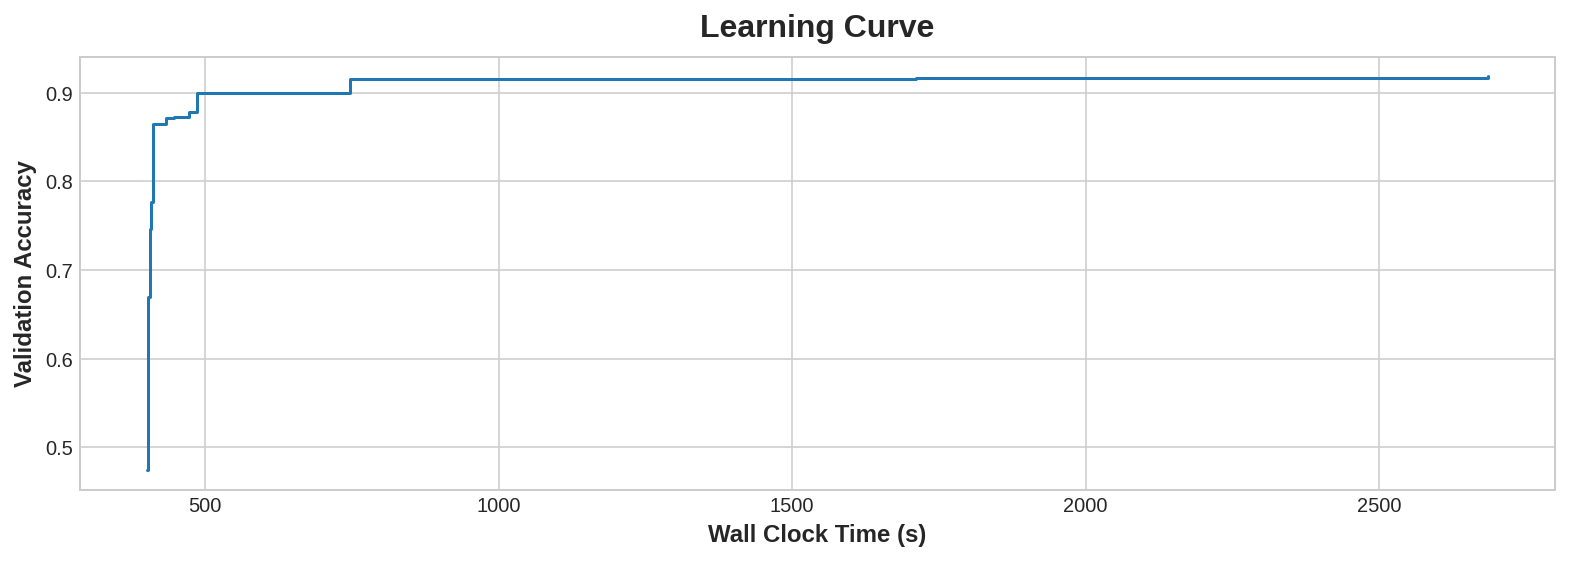

In [109]:
# Plots learning curve

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename="./logs/flaml.log", time_budget=2700)

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [99]:
# Saves the automl model into disk

with open("./models/automl.pkl", "wb") as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

# Submission

In [44]:
# Loads submission data set that acts just as a template for submission
submission = pd.read_csv("./data/sample_submission.csv")

# Sets "id" column as index of the dataset
test.set_index("Id", drop=True, append=False, inplace=True)

In [101]:
# Drops these features as were for deleted for training data set, too.
test.drop(["Soil_Type7", "Soil_Type15"], axis=1, inplace=True)

In [102]:
# Downgrades data types to occupy less memory

test = test.astype("int16")

In [103]:
#Frees memory after data compression
gc.collect()

646

In [104]:
# Performs predictions on the test data set

predictions = automl.predict(test)

In [106]:
# Sets targets column with predictions
submission.Cover_Type = predictions

# Checks submission dataframe before final submission
submission

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
...,...,...
999995,4999995,2
999996,4999996,1
999997,4999997,2
999998,4999998,1


In [46]:
# Saves test predictions
submission.to_csv("./submission.csv", index=False)

_**Leaderboard score against this submission was 0.95486 and highest score as on 10:40 PM, 21st Dec. 2021 was 0.95716**_